In [1]:
def load_questions(activation_f, question_f, max_size = -1):
    activations_file = "/Users/daniel/ideaProjects/allennlp/" + activation_f
    questions_file = "/Users/daniel/ideaProjects/allennlp/" + question_f
    features = []
    pred_ans = []
    with open(activations_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            # print(i)
            # print(l[0:100])

            if (max_size > -1 and len(pred_ans) > max_size):
                break

            if i % 2 == 0:
                # print(l)
                data = json.loads(l)
                features.append(data)
            else:
                pred_ans.append(l)

    questions = []
    labels = []
    with open(questions_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
#             print(i)
#             print(l[0:100])
            if i % 3 == 0:
                questions.append({})
                questions[int(i / 3)]["q"] = l
            elif i % 3 == 1:
                questions[int(i / 3)]["p"] = l
            elif i % 3 == 2:
                ans = json.loads(l)
                questions[int(i / 3)]["a"] = [c['text'] for c in ans]
                labels.append(ans[0]['text'])

            if (max_size > -1 and len(labels) > max_size):
                break
    mat = numpy.array(features)

    return (mat, labels, questions, pred_ans)

In [2]:
from prereq import Prerequisit_Skills

preq = Prerequisit_Skills()
# print(preq.skills_map)
prerequisits = preq.read_prereq_file("mctest.json")

# ignore the nonsense content 
prerequisits = {x: prerequisits[x]  for x in prerequisits.keys() if 'Nonsense' not in prerequisits[x] }
# print(len(prerequisits))
# print(set(prerequisits.keys()))
# print(len(set(prerequisits.keys())))
prerequisits

100


{'mc160.dev.0-1': ['No skill'],
 'mc160.dev.0-2': ['Object Tracking', 'Elaboration', 'Coreference'],
 'mc160.dev.0-3': ['Schematic clauses'],
 'mc160.dev.0-4': ['Object Tracking'],
 'mc160.dev.1-1': ['Coreference'],
 'mc160.dev.1-2': ['Coreference', 'Schematic clauses'],
 'mc160.dev.1-3': ['Schematic clauses', 'Spatio-temporal'],
 'mc160.dev.1-4': ['Causality'],
 'mc160.dev.2-1': ['Coreference', 'Schematic clauses'],
 'mc160.dev.2-2': ['Schematic clauses', 'Punctuation', 'Causality'],
 'mc160.dev.2-3': ['No skill'],
 'mc160.dev.2-4': ['Coreference', 'Schematic clauses'],
 'mc160.dev.4-1': ['Bridging'],
 'mc160.dev.4-2': ['Bridging', 'Coreference'],
 'mc160.dev.4-3': ['Bridging'],
 'mc160.dev.4-4': ['Schematic clauses'],
 'mc160.dev.5-1': ['Coreference'],
 'mc160.dev.5-3': ['Coreference'],
 'mc160.dev.5-4': ['No skill'],
 'mc160.dev.6-1': ['Coreference'],
 'mc160.dev.6-2': ['Bridging'],
 'mc160.dev.6-3': ['Meta-knowledge', 'Schematic clauses', 'Coreference'],
 'mc160.dev.6-4': ['Bridgin

In [3]:
def normalize(list1): 
    return [ord(x) - ord('A') for x in list1]


correct_answer_map = {}
def read_answers(ff, prefix): 
    with open(ff) as file2:
        content = file2.read().splitlines()
        for line_iter, line in enumerate(content):
            for ans_iter, ans in enumerate(normalize(line.split("\t"))): 
                correct_answer_map[prefix + str(line_iter) + "-" + str(ans_iter + 1)] = ans

# read correct answers 
ansfile160 = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest/ans/mc160.dev.ans.txt"
ansfile500 = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest/ans/mc500.dev.ans.txt"

read_answers(ansfile160, "mc160.dev.")
read_answers(ansfile500, "mc500.dev.")
correct_answer_map

{'mc160.dev.0-1': 0,
 'mc160.dev.0-2': 2,
 'mc160.dev.0-3': 1,
 'mc160.dev.0-4': 1,
 'mc160.dev.1-1': 2,
 'mc160.dev.1-2': 3,
 'mc160.dev.1-3': 3,
 'mc160.dev.1-4': 0,
 'mc160.dev.2-1': 0,
 'mc160.dev.2-2': 2,
 'mc160.dev.2-3': 3,
 'mc160.dev.2-4': 3,
 'mc160.dev.3-1': 0,
 'mc160.dev.3-2': 1,
 'mc160.dev.3-3': 2,
 'mc160.dev.3-4': 1,
 'mc160.dev.4-1': 1,
 'mc160.dev.4-2': 1,
 'mc160.dev.4-3': 1,
 'mc160.dev.4-4': 2,
 'mc160.dev.5-1': 0,
 'mc160.dev.5-2': 2,
 'mc160.dev.5-3': 3,
 'mc160.dev.5-4': 1,
 'mc160.dev.6-1': 1,
 'mc160.dev.6-2': 1,
 'mc160.dev.6-3': 1,
 'mc160.dev.6-4': 3,
 'mc160.dev.7-1': 0,
 'mc160.dev.7-2': 3,
 'mc160.dev.7-3': 1,
 'mc160.dev.7-4': 1,
 'mc160.dev.8-1': 2,
 'mc160.dev.8-2': 2,
 'mc160.dev.8-3': 2,
 'mc160.dev.8-4': 2,
 'mc160.dev.9-1': 3,
 'mc160.dev.9-2': 1,
 'mc160.dev.9-3': 2,
 'mc160.dev.9-4': 3,
 'mc160.dev.10-1': 2,
 'mc160.dev.10-2': 0,
 'mc160.dev.10-3': 2,
 'mc160.dev.10-4': 3,
 'mc160.dev.11-1': 0,
 'mc160.dev.11-2': 3,
 'mc160.dev.11-3': 2,
 'mc16

In [5]:
import json
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

(mat, labels, questions, pred_ans) = load_questions("ipython/mctest/out33-ner-test.txt", "ipython/mctest/out22-ner-test.txt", max_size=-1)
# (mat_ad, labels_ad, questions_ad, pred_ans_ad) = load_questions("ipython/babi/out33-adv.txt", "ipython/babi/out22-adv.txt", max_size=-1)

# print(questions[0:10])

# read the questions and remember question ids:
question_paragraph_id_map = {}
ff = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest.json"
with open(ff) as file:
    dataset_json = json.load(file)
    dataset = dataset_json['data']
    for article in dataset:
        for paragraph in article['paragraphs']:
            for qa in paragraph['qas']:
                if qa['id'] in prerequisits: 
                    key = qa['question'] + paragraph['context']
                    question_paragraph_id_map[key] = qa['id']

pred_ans

['Jessie Bear',
 'two best friends tocome',
 'a new jump rope and a fun game',
 'two',
 'her family',
 'tell them about her summer vacation',
 'she enjoyed nature',
 'camp',
 'a town outside the city',
 'so manycars',
 'in a town outside the city',
 'peaceful and quietand full of trees, flowers and animals.  One day his dad came in from work and said "Comeon, son, I\'m going to take you to the city." Todd was very exited so he put on his shoesand ran to the car.  When they got to the city Todd was very surprised there were so manycars',
 'pulled back to the curb',
 'started pulling away from the curb whenthey got to the corner',
 'ice cream truckhad',
 'told their mom about how close theycame',
 'Kelsey',
 'floor to floor',
 'much bigger than we had imagined',
 'spent our vacation playing',
 'Thismade',
 'to celebrate Ana winning',
 'spelling beewinner',
 "Everyone in Ana'sschool",
 'jump they wouldmake great friends',
 'lily pad',
 'spider',
 'wasGilbert',
 'green',
 'purple',
 'green

In [6]:
info_map = {}        
mat_new = []
labels_new = []
questions_new = []
pred_ans_new = []
multirc_reasoning_types = []
for i, x in enumerate(questions): 
#     print(qa)
    key = x['q'] + x['p']
    if key in question_paragraph_id_map: 
        mat_new.append(mat[i])
        labels_new.append(labels[i])
        questions_new.append(questions[i])
        pred_ans_new.append(pred_ans[i])
        idd = question_paragraph_id_map[key]
        ans_idx = correct_answer_map[idd]
        all_ans = x['a']
        ans = [1 if ans_idx == i else 0 for i in range(len(all_ans))]
#         print(ans_idx)
#         print(ans)
        multirc_reasoning_types.append(prerequisits[idd])
        info_map[x['q']] = (all_ans, ans, prerequisits[idd])
        
# len(questions_new)
# questions_new, info_map, 
pred_ans_new

['Jessie Bear',
 'two best friends tocome',
 'a new jump rope and a fun game',
 'two',
 'her family',
 'tell them about her summer vacation',
 'she enjoyed nature',
 'camp',
 'a town outside the city',
 'so manycars',
 'in a town outside the city',
 'peaceful and quietand full of trees, flowers and animals.  One day his dad came in from work and said "Comeon, son, I\'m going to take you to the city." Todd was very exited so he put on his shoesand ran to the car.  When they got to the city Todd was very surprised there were so manycars',
 'Kelsey',
 'floor to floor',
 'much bigger than we had imagined',
 'spent our vacation playing',
 'Thismade',
 'spelling beewinner',
 "Everyone in Ana'sschool",
 'jump they wouldmake great friends',
 'lily pad',
 'spider',
 'wasGilbert',
 'if she could hit a ball',
 'her Dad',
 'for not givingup',
 'very far',
 'theysuddenly',
 'in the water',
 'playing in the water',
 'almost an hour',
 'Mike and Jeff',
 'split their money they win',
 'split their mon

{'Coreference', 'Causality', 'Punctuation', 'Spatio-temporal', 'Logical Reasoning', 'No skill', 'Schematic clauses', 'Ellipsis (implicit info)', 'Object Tracking', 'Bridging', 'Meta-knowledge', 'Elaboration', 'Mathematical Reasoning'}
Coreference -> 22.374651019374443 0
Causality -> 5.787037037037037 0
Punctuation -> 0.0 0
Spatio-temporal -> 28.122660081422968 0
Logical Reasoning -> 20.04310344827586 0
No skill -> 36.35161135161135 0
Schematic clauses -> 24.660586187252523 0
Ellipsis (implicit info) -> 17.045454545454547 0
Object Tracking -> 16.03174603174603 0
Bridging -> 20.38910295486157 0
Meta-knowledge -> 0.0 0
Elaboration -> 6.73648247177659 0
Mathematical Reasoning -> 12.5 0


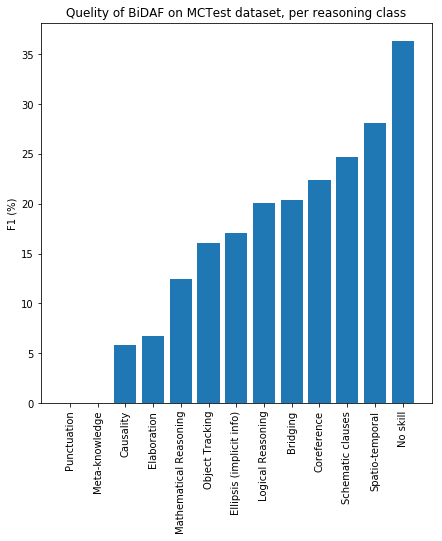

In [7]:
from evaluate11 import metric_max_over_ground_truths, f1_score, exact_match_score

# find the quality per reasoning type
scores = []
unique_types111 = set([y for x in multirc_reasoning_types for y in x])
print(unique_types111)

assert len(pred_ans_new) == len(questions_new)

scores_zipped_labels= []
for t in unique_types111:
#     print(t)
    scores_ins = []
    # select questions which contain the reasoning type 
    for i, x  in enumerate(questions_new): 
        question = x["q"]
        (ans_text, correct_or_not, phenomenon_labels) = info_map[question]
        assert sum(correct_or_not) > 0
#         print("correct_or_not: ", correct_or_not)
#         print("t: ", t)
        if t in phenomenon_labels: # check if the target phenomena is included 
            correct_ans = [a for (a, c) in zip(ans_text,correct_or_not) if c == 1]
#             print("i: ", i)
#             print("pred_ans_new: ", pred_ans_new[i])
            predicted_label = pred_ans_new[i]
#             print(correct_ans)
            max_f1 = max([f1_score(predicted_label,y) for y in correct_ans])
#             print(str(c) + " -> " + str(100.0 * max_f1))
            scores_ins.append(100.0 * max_f1)
    scores_zipped_labels.append((sum(scores_ins) / len(scores_ins), t))
    print(str(t) + " -> " + str(sum(scores_ins) / len(scores_ins)), len(scores))
# similarity = [f1_score(x,y) for x,y in zip(pred_ans, labels)]

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(7, 7))

# scores_zipped_labels = list(zip(scores,unique_types111))
scores_zipped_labels.sort(key=lambda x: x[0])
scores22, unique_types22 = zip(*scores_zipped_labels)

plt.bar(range(len(scores22)), scores22)
# ax.plot(range(len(scores)), scores, 'o')
ax.set_ylabel('F1 (%)')
ax.set_title('Quelity of BiDAF on MCTest dataset, per reasoning class')
# ax.set_yticks(range(len(q_labels)))
# ax.set_xticks(range(len(bibi_reasoning_types)))
ax.set_xticks(np.arange(len(unique_types22)))

# ax.set_yticklabels(q_labels)
ax.set_xticklabels(unique_types22, rotation=90)
plt.show()

In [8]:
# mat_concat = np.concatenate((mat, mat_ad), axis=0)
# reasoning_types = ["squad"]*len(pred_ans) + bibi_reasoning_types
unique_reasoning_types = list(unique_types111) # list(set(bibi_reasoning_types))
# # unique_reasoning_types_indices = list(range(len(unique_reasoning_types)))
multirc_reasoning_type_indices = [unique_reasoning_types.index(x) for coll in multirc_reasoning_types for x in coll]
# labels_concat = np.concatenate((labels, labels_ad))
# pred_concat = np.concatenate((pred_ans, pred_ans_ad))

# multirc_reasoning_type_indices
# unique_reasoning_types.index(x) 

In [9]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=len(unique_reasoning_types), random_state=2).fit(mat_new)
# db = DBSCAN(eps=0.3, min_samples=10).fit(mat_ad)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# labelsss = db.labels_
# repeat the labels, for each category 
labelsss = []
for i, l in enumerate(db.labels_): 
    for j in range(len(multirc_reasoning_types[i])): 
        labelsss.append(l)

len(unique_reasoning_types)

13

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

print(len(multirc_reasoning_type_indices))
print(len(labelsss))
matt1 = confusion_matrix(multirc_reasoning_type_indices, labelsss) 

178
178


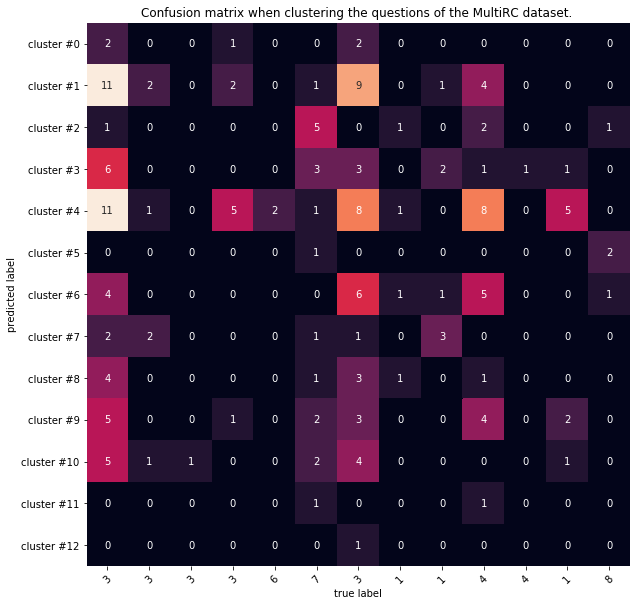

In [12]:
plt.figure(figsize=(10, 10))
sss = sns.heatmap(matt1.T, square=True,
            annot=True,
            fmt='d', cbar=False,
            xticklabels=True,
            yticklabels=True
            )

y_labels = ['cluster #' + str(i) for i in range(len(unique_reasoning_types))]
sss.set_xticklabels(labelsss, rotation=45)
sss.set_yticklabels(y_labels, rotation=0)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix when clustering the questions of the MultiRC dataset. ')
plt.show()

In [22]:
# clustering points into two groups
ss = len(unique_types111)
unique_types111_list = list(unique_types111)
accuracy_table = np.zeros(shape=(ss, ss)) 
count_table = np.empty(shape=(ss, ss), dtype=object) 

for ind1, type1 in enumerate(unique_types111): 
    for ind2, type2 in enumerate(unique_types111):

        count1 = 0
        count2 = 0
        
#         if ind1 > 3 or ind2 >3: 
#             continue 
        
        # we want different types 
        if type1 == type2 or ind2 <= ind1: 
            continue 
        print("type1: ", type1, " type2: ", type2)
        
        # loop through instances and select the points that have one of the two labels. 
        points = []
        labels = []
        for i, x in enumerate(multirc_reasoning_types): 
            
            if type1 in x and type2 not in x: 
                labels.append(x)
                points.append(mat_new[i])
                count1 += 1
                
            if type2 in x and type1 not in x : 
                labels.append(x)
                points.append(mat_new[i])
                count2 += 1
                
#             if type1 in x or type2 in x:
#                 points.append(mat_new[i])
#                 labels.append(x)
        
        from sklearn.cluster import KMeans
        db = KMeans(n_clusters=2, random_state=2).fit(points)
        cluster_labels = db.labels_
        
        # calculate the confusion matrix 
        same_label_same_cluster = 0
        same_label_diff_cluster = 0
        diff_label_same_cluster = 0
        diff_label_diff_cluster = 0
        
        def check_if_label_is_shared(labels1, labels2): 
            label_intersection = list(set(labels1) & set(labels2))
            return (type1 in label_intersection) or (type2 in label_intersection)
            
        for ii in range(len(cluster_labels)):
            for jj in range(len(cluster_labels)):
#                 print(labels[ii], labels[jj], labels[ii] == labels[jj])
                if ii == jj: 
                    continue 
                if cluster_labels[ii] == cluster_labels[jj] and check_if_label_is_shared(labels[ii], labels[jj]): 
                    same_label_same_cluster += 1
                if cluster_labels[ii] != cluster_labels[jj] and check_if_label_is_shared(labels[ii], labels[jj]): 
                    same_label_diff_cluster += 1
                if cluster_labels[ii] == cluster_labels[jj] and not check_if_label_is_shared(labels[ii], labels[jj]): 
                    diff_label_same_cluster += 1
                if cluster_labels[ii] != cluster_labels[jj] and not check_if_label_is_shared(labels[ii], labels[jj]): 
                    diff_label_diff_cluster += 1
        total_pairs = same_label_same_cluster + same_label_diff_cluster + diff_label_same_cluster + diff_label_diff_cluster
        print("same_label_same_cluster: ", same_label_same_cluster / total_pairs, same_label_same_cluster)
        print("same_label_diff_cluster: ", same_label_diff_cluster / total_pairs, same_label_diff_cluster)
        print("diff_label_same_cluster: ", diff_label_same_cluster / total_pairs, diff_label_same_cluster)
        print("diff_label_diff_cluster: ", diff_label_diff_cluster / total_pairs, diff_label_diff_cluster)
        print("---------")
        accuracy_table[ind1][ind2] = (diff_label_diff_cluster + same_label_same_cluster) / total_pairs
        accuracy_table[ind2][ind1] = accuracy_table[ind1][ind2] 
        
        countstr = str(f"{len(labels)}/{count1}/{count2}")
        print(countstr)
        count_table[ind1][ind2] = countstr
        count_table[ind2][ind1] = count_table[ind1][ind2] 

accuracy_table

type1:  Coreference  type2:  Causality
same_label_same_cluster:  0.6045918367346939 1422
same_label_diff_cluster:  0.31547619047619047 742
diff_label_same_cluster:  0.039965986394557826 94
diff_label_diff_cluster:  0.039965986394557826 94
---------
49/47/2
type1:  Coreference  type2:  Punctuation
same_label_same_cluster:  0.48642533936651583 1290
same_label_diff_cluster:  0.4751131221719457 1260
diff_label_same_cluster:  0.01583710407239819 42
diff_label_diff_cluster:  0.02262443438914027 60
---------
52/51/1
type1:  Coreference  type2:  Spatio-temporal
same_label_same_cluster:  0.44769503546099293 1010
same_label_diff_cluster:  0.4326241134751773 976
diff_label_same_cluster:  0.06382978723404255 144
diff_label_diff_cluster:  0.05585106382978723 126
---------
48/45/3
type1:  Coreference  type2:  Logical Reasoning
same_label_same_cluster:  0.5153061224489796 1212
same_label_diff_cluster:  0.4846938775510204 1140
diff_label_same_cluster:  0.0 0
diff_label_diff_cluster:  0.0 0
---------
4

same_label_same_cluster:  0.48717948717948717 76
same_label_diff_cluster:  0.05128205128205128 8
diff_label_same_cluster:  0.23076923076923078 36
diff_label_diff_cluster:  0.23076923076923078 36
---------
13/9/4
type1:  Logical Reasoning  type2:  No skill
same_label_same_cluster:  0.43157894736842106 164
same_label_diff_cluster:  0.37894736842105264 144
diff_label_same_cluster:  0.12631578947368421 48
diff_label_diff_cluster:  0.06315789473684211 24
---------
20/2/18
type1:  Logical Reasoning  type2:  Schematic clauses
same_label_same_cluster:  0.4992887624466572 702
same_label_diff_cluster:  0.5007112375533428 704
diff_label_same_cluster:  0.0 0
diff_label_diff_cluster:  0.0 0
---------
38/0/38
type1:  Logical Reasoning  type2:  Ellipsis (implicit info)
same_label_same_cluster:  0.26666666666666666 8
same_label_diff_cluster:  0.2 6
diff_label_same_cluster:  0.4 12
diff_label_diff_cluster:  0.13333333333333333 4
---------
6/2/4
type1:  Logical Reasoning  type2:  Object Tracking
same_la

same_label_same_cluster:  0.3 6
same_label_diff_cluster:  0.3 6
diff_label_same_cluster:  0.1 2
diff_label_diff_cluster:  0.3 6
---------
5/1/4
type1:  Elaboration  type2:  Mathematical Reasoning
same_label_same_cluster:  0.48717948717948717 76
same_label_diff_cluster:  0.05128205128205128 8
diff_label_same_cluster:  0.23076923076923078 36
diff_label_diff_cluster:  0.23076923076923078 36
---------
13/9/4


array([[0.        , 0.64455782, 0.50904977, 0.5035461 , 0.51530612,
        0.65673077, 0.5010101 , 0.59372549, 0.4929078 , 0.53411765,
        0.49714286, 0.51684088, 0.49494949],
       [0.64455782, 0.        , 0.6       , 0.58095238, 0.46666667,
        0.47826087, 0.49825784, 0.53333333, 0.42857143, 0.5954023 ,
        0.52380952, 0.53846154, 0.44444444],
       [0.50904977, 0.6       , 0.        , 0.64444444, 1.        ,
        0.50877193, 0.48987854, 0.4       , 0.46428571, 0.73789174,
        1.        , 0.44444444, 0.4       ],
       [0.5035461 , 0.58095238, 0.64444444, 0.        , 0.49090909,
        0.48717949, 0.50588235, 0.61538462, 0.6       , 0.51566952,
        0.8       , 0.475     , 0.71794872],
       [0.51530612, 0.46666667, 1.        , 0.49090909, 0.        ,
        0.49473684, 0.49928876, 0.4       , 0.44444444, 0.71014493,
        1.        , 0.5       , 0.46666667],
       [0.65673077, 0.47826087, 0.50877193, 0.48717949, 0.49473684,
        0.        , 0.66606

In [16]:
# couts of the types  
# values, counts = np.unique(bibi_reasoning_types, return_counts=True)
# count_per_label = dict(zip(counts, values))
# new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]
# values, counts,dict(zip(counts, values)), new_label_ordering

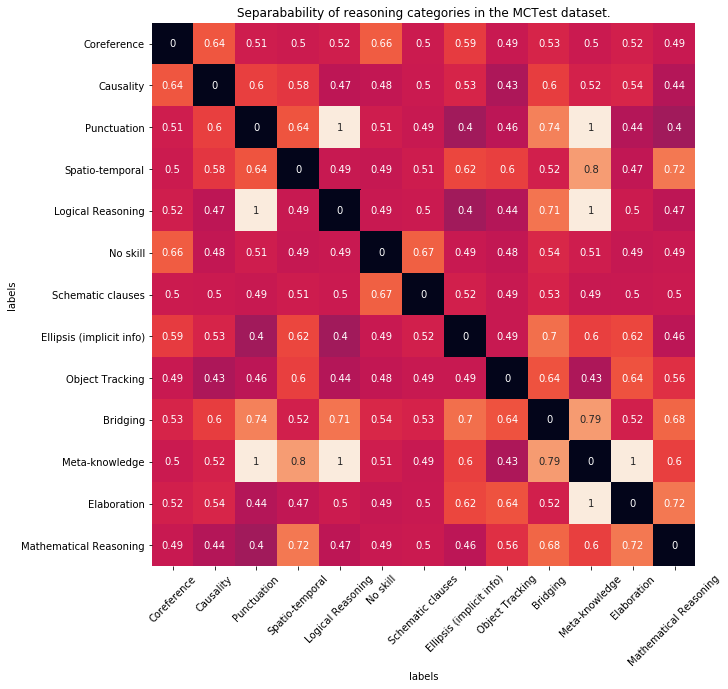

array([[0.        , 0.64455782, 0.50904977, 0.5035461 , 0.51530612,
        0.65673077, 0.5010101 , 0.59372549, 0.4929078 , 0.53411765,
        0.49714286, 0.51684088, 0.49494949],
       [0.64455782, 0.        , 0.6       , 0.58095238, 0.46666667,
        0.47826087, 0.49825784, 0.53333333, 0.42857143, 0.5954023 ,
        0.52380952, 0.53846154, 0.44444444],
       [0.50904977, 0.6       , 0.        , 0.64444444, 1.        ,
        0.50877193, 0.48987854, 0.4       , 0.46428571, 0.73789174,
        1.        , 0.44444444, 0.4       ],
       [0.5035461 , 0.58095238, 0.64444444, 0.        , 0.49090909,
        0.48717949, 0.50588235, 0.61538462, 0.6       , 0.51566952,
        0.8       , 0.475     , 0.71794872],
       [0.51530612, 0.46666667, 1.        , 0.49090909, 0.        ,
        0.49473684, 0.49928876, 0.4       , 0.44444444, 0.71014493,
        1.        , 0.5       , 0.46666667],
       [0.65673077, 0.47826087, 0.50877193, 0.48717949, 0.49473684,
        0.        , 0.66606

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

unique_types111_list = list(unique_types111)

plt.figure(figsize=(10, 10))
sss = sns.heatmap(accuracy_table, square=True,
            annot=True,
            cbar=False,
            xticklabels=True,
            yticklabels=True
            )

sss.set_xticklabels(unique_types111_list, rotation=45)
sss.set_yticklabels(unique_types111_list, rotation=0)
plt.xlabel('labels')
plt.ylabel('labels')
plt.title('Separabability of reasoning categories in the MCTest dataset.')
plt.show()

In [33]:
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in accuracy_table]))
unique_types111_list

0.0	0.6445578231292517	0.5090497737556561	0.5035460992907801	0.5153061224489796	0.6567307692307692	0.501010101010101	0.5937254901960785	0.4929078014184397	0.5341176470588235	0.49714285714285716	0.5168408826945412	0.494949494949495
0.6445578231292517	0.0	0.6	0.580952380952381	0.4666666666666667	0.4782608695652174	0.49825783972125437	0.5333333333333333	0.42857142857142855	0.5954022988505747	0.5238095238095238	0.5384615384615384	0.4444444444444444
0.5090497737556561	0.6	0.0	0.6444444444444445	1.0	0.5087719298245614	0.4898785425101215	0.4	0.4642857142857143	0.7378917378917379	1.0	0.4444444444444444	0.4
0.5035460992907801	0.580952380952381	0.6444444444444445	0.0	0.4909090909090909	0.48717948717948717	0.5058823529411764	0.6153846153846154	0.6	0.5156695156695157	0.8	0.475	0.717948717948718
0.5153061224489796	0.4666666666666667	1.0	0.4909090909090909	0.0	0.49473684210526314	0.4992887624466572	0.4	0.4444444444444444	0.7101449275362319	1.0	0.5	0.4666666666666667
0.6567307692307692	0.478260869565

['Coreference',
 'Causality',
 'Punctuation',
 'Spatio-temporal',
 'Logical Reasoning',
 'No skill',
 'Schematic clauses',
 'Ellipsis (implicit info)',
 'Object Tracking',
 'Bridging',
 'Meta-knowledge',
 'Elaboration',
 'Mathematical Reasoning']

In [31]:
count_table[count_table == None] = ""
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in count_table]))
unique_types111_list

	49/47/2	52/51/1	48/45/3	49/49/0	65/49/16	45/28/17	51/49/2	48/46/2	51/38/13	50/50/0	42/42/0	55/51/4
49/47/2		5/5/0	15/6/9	6/5/1	24/6/18	42/4/38	10/6/4	7/3/4	30/5/25	7/6/1	13/5/8	10/6/4
52/51/1	5/5/0		10/1/9	3/1/2	19/1/18	39/0/39	5/1/4	8/1/7	27/1/26	2/1/1	10/1/9	5/1/4
48/45/3	15/6/9	10/1/9		11/9/2	27/9/18	35/2/33	13/9/4	16/9/7	27/5/22	10/9/1	16/8/8	13/9/4
49/49/0	6/5/1	3/1/2	11/9/2		20/2/18	38/0/38	6/2/4	9/2/7	24/0/24	3/2/1	9/1/8	6/2/4
65/49/16	24/6/18	19/1/18	27/9/18	20/2/18		58/18/40	22/18/4	23/17/6	44/18/26	19/18/1	25/17/8	22/18/4
45/28/17	42/4/38	39/0/39	35/2/33	38/0/38	58/18/40		40/38/2	45/39/6	42/28/14	39/39/0	43/37/6	44/40/4
51/49/2	10/6/4	5/1/4	13/9/4	6/2/4	22/18/4	40/38/2		11/4/7	28/3/25	5/4/1	13/4/9	8/4/4
48/46/2	7/3/4	8/1/7	16/9/7	9/2/7	23/17/6	45/39/6	11/4/7		31/6/25	8/7/1	14/6/8	11/7/4
51/38/13	30/5/25	27/1/26	27/5/22	24/0/24	44/18/26	42/28/14	28/3/25	31/6/25		27/26/1	27/22/5	26/24/2
50/50/0	7/6/1	2/1/1	10/9/1	3/2/1	19/18/1	39/39/0	5/4/1	8/7/1	27/26/1		10/1/9	5/1/4
42/42/0	

['Coreference',
 'Causality',
 'Punctuation',
 'Spatio-temporal',
 'Logical Reasoning',
 'No skill',
 'Schematic clauses',
 'Ellipsis (implicit info)',
 'Object Tracking',
 'Bridging',
 'Meta-knowledge',
 'Elaboration',
 'Mathematical Reasoning']

[[0.         1.25       1.35652174 0.97402597 1.26315789 0.94117647
  1.18032787 1.05285412 1.01015965 1.07692308 1.28455285 1.2
  1.33333333]
 [1.25       0.         0.93023256 1.45846154 1.05263158 0.94736842
  0.93333333 1.01538462 1.02745098 1.04950495 1.13846154 1.84392015
  1.73333333]
 [1.35652174 0.93023256 0.         1.33457944 1.375      1.31428571
  1.43589744 0.98550725 1.02745098 1.12328767 1.05555556 2.
  0.91304348]
 [0.97402597 1.45846154 1.33457944 0.         1.44       1.35205993
  0.96296296 0.99384826 1.10967099 1.18386492 1.33457944 1.56495468
  1.50404313]
 [1.26315789 1.05263158 1.375      1.44       0.         1.05084746
  0.92857143 1.03195266 1.11309524 1.03703704 1.375      1.
  1.        ]
 [0.94117647 0.94736842 1.31428571 1.35205993 1.05084746 0.
  1.05882353 1.00663507 1.01624815 1.09803922 1.25581395 0.89655172
  1.03225806]
 [1.18032787 0.93333333 1.43589744 0.96296296 0.92857143 1.05882353
  0.         1.03651116 0.98989899 1.03703704 1.43589744 1.
  0

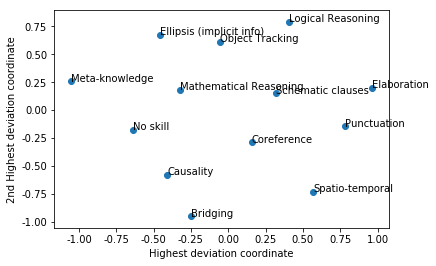

In [74]:
# Enforce triangle inequality
from scipy.sparse.csgraph import shortest_path

# dissimalrity = accuracy_table
#distanceMatrix = dissimalrity+0.5*np.eye(dissimalrity.shape[0], dissimalrity.shape[1])
distanceMatrix = accuracy_table # - np.ones(distanceMatrix.shape)
pathDistance=shortest_path(2*distanceMatrix)
print(pathDistance)

from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2,dissimilarity="precomputed", random_state=4)
emb=mds.fit_transform(pathDistance)
fig, ax = plt.subplots()
ax.scatter(emb[:,0],emb[:,1])
ax.set_xlabel("Highest deviation coordinate")
ax.set_ylabel("2nd Highest deviation coordinate")
for i, txt in enumerate(unique_types111):
    ax.annotate(txt, (emb[i,0],emb[i,1]))
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

# clustering points into two groups
ss = len(unique_types111)
accuracy_table = np.zeros(shape=(ss, ss)) 

from sklearn.svm import SVC

for ind1, type1 in enumerate(unique_types111): 
    for ind2, type2 in enumerate(unique_types111):
        
#         if ind1 > 3 or ind2 >3: 
#             continue 
        
        # we want different types 
        if type1 == type2 or ind2 <= ind1: 
            continue 
        print("type1: ", type1, " type2: ", type2)
        
        # loop through instances and select the points that have one of the two labels. 
        points = []
        labels = []
        original_labels = []
        original_labels.append(x)
        for i, x in enumerate(multirc_reasoning_types): 
            if type1 in x or type2 in x:
                if type1 in x and type2 not in x: 
                    labels.append(1)
                    points.append(mat_new[i])
                    original_labels.append(x)
                    
                if type2 in x and type1 not in x : 
                    labels.append(0)
                    points.append(mat_new[i])
                    original_labels.append(x)
                
#                 labels.append(x)     
#         from sklearn.cluster import KMeans
#         db = KMeans(n_clusters=2, random_state=2).fit(points)
#         cluster_labels = db.labels_
        
        clf = LogisticRegression()
#         clf = SVC()
        print("points: ", len(points))
        print("labels: ", len(labels))
        print("labels: ", labels)
        cluster_labels = []
        if len(set(labels)) > 1: 
            clf.fit(points, labels) 
            cluster_labels = clf.predict(points)
        
            print("cluster_labels: ", len(cluster_labels))
            print(cluster_labels)

            # calculate the confusion matrix 
            same_label_same_cluster = 0
            same_label_diff_cluster = 0
            diff_label_same_cluster = 0
            diff_label_diff_cluster = 0

            def check_if_label_is_shared(labels1, labels2): 
                label_intersection = list(set(labels1) & set(labels2))
                return (type1 in label_intersection) or (type2 in label_intersection)

            for ii in range(len(cluster_labels)):
                for jj in range(len(cluster_labels)):
    #                 print(labels[ii], labels[jj], labels[ii] == labels[jj])
                    if ii == jj: 
                        continue 
                    if cluster_labels[ii] == cluster_labels[jj] and check_if_label_is_shared(original_labels[ii], original_labels[jj]): 
                        same_label_same_cluster += 1
                    if cluster_labels[ii] != cluster_labels[jj] and check_if_label_is_shared(original_labels[ii], original_labels[jj]): 
                        same_label_diff_cluster += 1
                    if cluster_labels[ii] == cluster_labels[jj] and not check_if_label_is_shared(original_labels[ii], original_labels[jj]): 
                        diff_label_same_cluster += 1
                    if cluster_labels[ii] != cluster_labels[jj] and not check_if_label_is_shared(original_labels[ii], original_labels[jj]): 
                        diff_label_diff_cluster += 1
            total_pairs = same_label_same_cluster + same_label_diff_cluster + diff_label_same_cluster + diff_label_diff_cluster
            assert total_pairs > 0
            print("total_pairs: ", total_pairs)
            print("same_label_same_cluster: ", same_label_same_cluster / total_pairs, same_label_same_cluster)
            print("same_label_diff_cluster: ", same_label_diff_cluster / total_pairs, same_label_diff_cluster)
            print("diff_label_same_cluster: ", diff_label_same_cluster / total_pairs, diff_label_same_cluster)
            print("diff_label_diff_cluster: ", diff_label_diff_cluster / total_pairs, diff_label_diff_cluster)
            print("---------")
            accuracy_table[ind1][ind2] = (diff_label_diff_cluster + same_label_same_cluster) / total_pairs
            accuracy_table[ind2][ind1] = accuracy_table[ind1][ind2] 
        else: 
            print("not enough points ..... ")
            accuracy_table[ind2][ind1] = -1 
            accuracy_table[ind1][ind2] = -1 
accuracy_table


type1:  Ellipsis (implicit info)  type2:  Bridging
points:  28
labels:  28
labels:  [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
cluster_labels:  28
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
total_pairs:  756
same_label_same_cluster:  0.626984126984127 474
same_label_diff_cluster:  0.1746031746031746 132
diff_label_same_cluster:  0.1746031746031746 132
diff_label_diff_cluster:  0.023809523809523808 18
---------
type1:  Ellipsis (implicit info)  type2:  Mathematical Reasoning
points:  8
labels:  8
labels:  [1, 1, 0, 0, 0, 0, 1, 1]
cluster_labels:  8
[1 1 0 0 0 0 1 1]
total_pairs:  56
same_label_same_cluster:  0.21428571428571427 12
same_label_diff_cluster:  0.21428571428571427 12
diff_label_same_cluster:  0.21428571428571427 12
diff_label_diff_cluster:  0.35714285714285715 20
---------
type1:  Ellipsis (implicit info)  type2:  Logical Reasoning
points:  6
labels:  6
labels:  [1, 1, 1, 0, 0, 1]
cluster_labels:  6
[1 1 1 0 0 1]
total

total_pairs:  1722
same_label_same_cluster:  0.27293844367015097 470
same_label_diff_cluster:  0.24041811846689895 414
diff_label_same_cluster:  0.27177700348432055 468
diff_label_diff_cluster:  0.2148664343786295 370
---------
type1:  Bridging  type2:  Elaboration
points:  27
labels:  27
labels:  [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
cluster_labels:  27
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
total_pairs:  702
same_label_same_cluster:  0.4700854700854701 330
same_label_diff_cluster:  0.20512820512820512 144
diff_label_same_cluster:  0.21652421652421652 152
diff_label_diff_cluster:  0.10826210826210826 76
---------
type1:  Bridging  type2:  Punctuation
points:  27
labels:  27
labels:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
cluster_labels:  27
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
total_pairs:  702
same_label_same_cluster:  0.8547008547008547 600
same_label_diff_clust

cluster_labels:  23
[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0]
total_pairs:  506
same_label_same_cluster:  0.3241106719367589 164
same_label_diff_cluster:  0.25296442687747034 128
diff_label_same_cluster:  0.2727272727272727 138
diff_label_diff_cluster:  0.15019762845849802 76
---------
type1:  No skill  type2:  Coreference
points:  65
labels:  65
labels:  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
cluster_labels:  65
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
total_pairs:  4160
same_label_same_cluster:  0.3908653846153846 1626
same_label_diff_cluster:  0.2091346153846154 870
diff_label_same_cluster:  0.23221153846153847 966
diff_label_diff_cluster:  0.16778846153846153 698
---------
type1:  No skill  type2:  Spatio-temporal
points:  27
label

array([[ 0.        ,  0.65079365,  0.57142857,  0.46666667,  0.46666667,
         0.58441558,  0.45454545,  0.85254902,  0.46153846,  0.4       ,
         0.81538462,  0.46153846,  0.4       ],
       [ 0.65079365,  0.        ,  0.78769231, -1.        ,  0.67356322,
         0.58879493,  0.67956989,  0.54431373,  0.55270655,  0.79202279,
         0.48780488,  0.57834758,  0.92877493],
       [ 0.57142857,  0.78769231,  0.        ,  0.53333333,  0.57777778,
         0.76190476,  0.6       ,  0.8962963 ,  0.64102564,  0.7       ,
         0.87209302,  0.64102564,  0.7       ],
       [ 0.46666667, -1.        ,  0.53333333,  0.        ,  0.33333333,
         0.59473684,  0.38888889, -1.        ,  0.41818182,  0.66666667,
        -1.        ,  0.47222222,  0.66666667],
       [ 0.46666667,  0.67356322,  0.57777778,  0.33333333,  0.        ,
         0.48188406,  0.47619048,  0.81122449,  0.45714286,  0.38095238,
         0.68060395,  0.46153846, -1.        ],
       [ 0.58441558,  0.588794

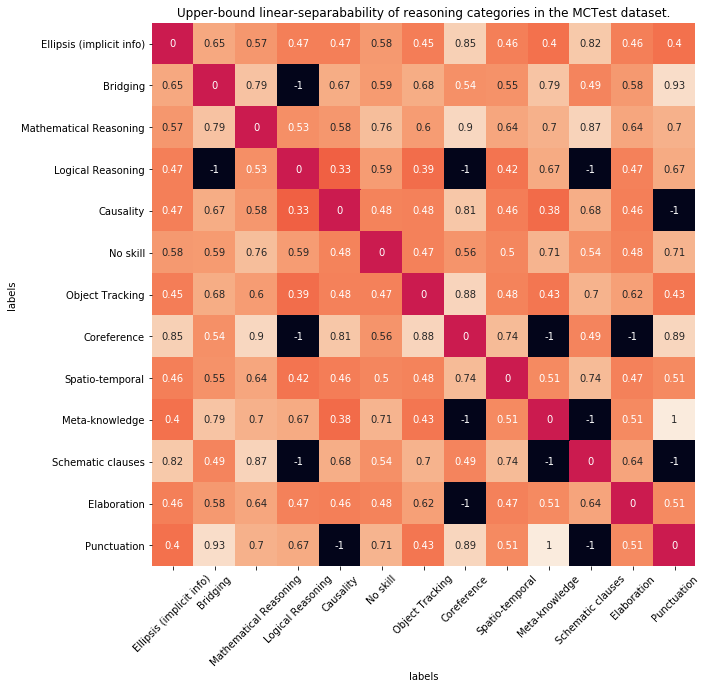

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

plt.figure(figsize=(10, 10))
sss = sns.heatmap(accuracy_table, square=True,
            annot=True,
            cbar=False,
            xticklabels=True,
            yticklabels=True
            )

sss.set_xticklabels(unique_types111, rotation=45)
sss.set_yticklabels(unique_types111, rotation=0)
plt.xlabel('labels')
plt.ylabel('labels')
plt.title('Upper-bound linear-separabability of reasoning categories in the MCTest dataset.')
plt.show()

In [16]:
# Enforce triangle inequality
from scipy.sparse.csgraph import shortest_path

# distanceMatrix = accuracy_table # - np.ones(distanceMatrix.shape)
pathDistance=shortest_path(2*accuracy_table)
print(pathDistance)

from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2,dissimilarity="precomputed", random_state=4)
emb=mds.fit_transform(pathDistance)
fig, ax = plt.subplots()
ax.scatter(emb[:,0],emb[:,1])
ax.set_xlabel("Highest deviation coordinate")
ax.set_ylabel("2nd Highest deviation coordinate")
for i, txt in enumerate(unique_reasoning_types):
    ax.annotate(txt, (emb[i,0],emb[i,1]))
plt.show()
unique_reasoning_types

NegativeCycleError: Negative cycle in nodes [ 0  1  2  3  4  5  6  7  8  9 10 11 12]

In [47]:
# a single classifier 
from sklearn.neural_network import MLPClassifier

# training a single classifier on the data 
from sklearn.linear_model import LogisticRegression
import numpy 

ss = len(unique_reasoning_types)
accuracy_table = np.zeros(shape=(ss, ss)) 


from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

np.random.shuffle(multirc_reasoning_types)

multirc_reasoning_types_binarized = mlb.fit_transform(multirc_reasoning_types)
mlb.classes_

# print(len(multirc_reasoning_types))

mlp = MLPClassifier(hidden_layer_sizes=(), alpha=10)
mlp.fit(mat_new,multirc_reasoning_types_binarized)


/Users/daniel/.virtualenvs/bidaf_allennlp/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score    
    
predictions = mlp.predict(mat_new)

for i, class_ in enumerate(mlb.classes_): 
    predictions_per_class = [x[i] for x in predictions]
    gold_per_class = [x[i] for x in multirc_reasoning_types_binarized]
    f1_ = f1_score(gold_per_class, predictions_per_class) 
    size_ = sum(gold_per_class)
    print(f"Class: {class_} \t count: {size_} \t F1: {f1_}")
    

Class: Bridging 	 count: 26 	 F1: 1.0
Class: Causality 	 count: 6 	 F1: 0.6666666666666666
Class: Coreference 	 count: 51 	 F1: 0.9807692307692307
Class: Elaboration 	 count: 9 	 F1: 0.8
Class: Ellipsis (implicit info) 	 count: 4 	 F1: 0.8571428571428571
Class: Logical Reasoning 	 count: 2 	 F1: 0.0
Class: Mathematical Reasoning 	 count: 4 	 F1: 1.0
Class: Meta-knowledge 	 count: 1 	 F1: 1.0
Class: No skill 	 count: 18 	 F1: 0.9714285714285714
Class: Object Tracking 	 count: 7 	 F1: 0.8333333333333333
Class: Punctuation 	 count: 1 	 F1: 0.0
Class: Schematic clauses 	 count: 40 	 F1: 1.0
Class: Spatio-temporal 	 count: 9 	 F1: 1.0


/Users/daniel/.virtualenvs/bidaf_allennlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score    
    
predictions = mlp.predict(mat_new)

for i, class_ in enumerate(mlb.classes_): 
    predictions_per_class = [x[i] for x in predictions]
    gold_per_class = [x[i] for x in multirc_reasoning_types_binarized]
    f1_ = f1_score(gold_per_class, predictions_per_class) 
    size_ = sum(gold_per_class)
    print(f"Class: {class_} \t count: {size_} \t F1: {f1_}")
    

Class: Bridging 	 count: 26 	 F1: 0.9803921568627451
Class: Causality 	 count: 6 	 F1: 0.9090909090909091
Class: Coreference 	 count: 51 	 F1: 1.0
Class: Elaboration 	 count: 9 	 F1: 0.9411764705882353
Class: Ellipsis (implicit info) 	 count: 4 	 F1: 0.8571428571428571
Class: Logical Reasoning 	 count: 2 	 F1: 0.6666666666666666
Class: Mathematical Reasoning 	 count: 4 	 F1: 0.6666666666666666
Class: Meta-knowledge 	 count: 1 	 F1: 0.0
Class: No skill 	 count: 18 	 F1: 0.9714285714285714
Class: Object Tracking 	 count: 7 	 F1: 0.8333333333333333
Class: Punctuation 	 count: 1 	 F1: 1.0
Class: Schematic clauses 	 count: 40 	 F1: 0.975
Class: Spatio-temporal 	 count: 9 	 F1: 0.8750000000000001


/Users/daniel/.virtualenvs/bidaf_allennlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
